# Tutorial 2: Importing and Wrangling Data

## File Locations

When dealing with files on your computer, you need to tell python the 'path' to that file. Paths can be *relative* or *absolute*. An *absolute* path might looks like this:

    /users/myname/Desktop/Python_Tutorials/data/my_data.txt
    
it always starts with a `/`, which represents the 'root' directory of your computer (i.e. the `C:\\` drive on Windows, or the the `/` directory on Mac/Linux). These paths are unambiguous, and you'll always be able to find that file on your computer (as long as you don't move the file). However, if someone else were to open your code on their own computer, the file path might break because the start of your path (`/users/myname/Desktop/Python_Tutorials`) might not be the same on their system (e.g. they might use `/users/theirname/Documents/Python_Tutorials`). This is where *relative* paths are useful.

A *relative* path might look like this:

    data/my_data.txt

If there is no `/` at the start, Python will look for this file in its *working directory*. The working directory is the location where python is running. Using *relative* paths means that any other person can run your code, as long as they start Python in the `Python_Tutorials` folder on their computer. 

**Relative imports are more robust and shareable. Use them!**

**Tip:** If you ever run into a `FileNotFoundError`, first check that there are no spelling mistakes in the path (tab autocompletion is your friend here!), and then check that the file path is definitely correct.

### Paths in Jupyter Notebooks

When you start Jupyter Notebooks it is running in a location - it has a *working directory*. You can find out where it's running by typing:

    pwd

(which stands for 'print working directory') in a cell, and evaluating it. This will print out the working directory. You can specify paths *relative* to this location.

You can also change the working directory within jupyter, using:

    cd /path/to/new/working/directory

(try running `pwd` again - it should have changed to your new location).

However, this can be a little clumsy, and it's easy to forget to do this every time you start a new notebook. The 'best practice' approach is to select the correct directory *before* you start jupyter notebook. To do this, before you launch `jupyter notebook` from the Terminal (Mac/Linux) or Anaconda Prompt (Windows) you can do:

    cd /path/to/my/working/directory
    jupyter notebook

This will start jupyter notebook in the correct directory to start with, and then all files can be specified *relative* to that location.

## Basic Data Import Principles

    Explicit is better than implicit.

A little time thinking about data structure and labelling maked everything easier. In practice, this means:

- Use meaningful, unique column names.
- Avoid special characters and spaces.
- Avoid 'merged cells' to label groups of columns.

In most cases, the best format for your data will be simple columns or matrices.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
good = pd.read_excel('data/good_practice.xlsx', index_col=(0))
good.head(5)  # .head() just displays the top n lines - .tail() does similar for the end.

,Sample_Type,A,A_std,B,B_std
Sample_No,,,,,
1,Cheese,16.154891,0.750881,5.047529,0.125502
2,Cheese,16.140008,0.266744,5.426846,0.089972
3,Cheese,16.851359,0.178319,5.629535,0.162741
4,Cheese,16.205427,0.240194,5.389100,0.122976
5,Cheese,16.240021,0.720534,5.132573,0.171547


Imports with no issues, and it's very ovious what things are.

In [3]:
# bad = pd.read_excel('bad_practice.xlsx')
bad = pd.read_excel('data/bad_practice.xlsx', header=(0,1))

bad.head(5)

Unnamed: 0_level_0          A                     B            
Sample no.        Sample Type      Value Stand. Dev.     Value Stand. Dev.
1                      Cheese  16.154891    0.750881  5.047529    0.125502
2                      Cheese  16.140008    0.266744  5.426846    0.089972
3                      Cheese  16.851359    0.178319  5.629535    0.162741
4                      Cheese  16.205427    0.240194  5.389100    0.122976
5                      Cheese  16.240021    0.720534  5.132573    0.171547

Possible to get it to import, but takes more effort, and can be more irritating to get into the right format.

# Data Import: Examples

We'll go through importing using `numpy`, `pandas` and `sqlite`.

## `numpy` data import.

`numpy` is the 'numeric python' library. It's used for basically all 'behind the scenes' computations in Python. Often it will be more convenient to use a higher-level library like `pandas` to interact with your data, but if you're doing something that pandas doesn't handle well (e.g. working with 2D arrays), or want to make something 'lightweight' that doesn't rely on a lot of packages, `numpy` might be a better choice.

`numpy` is designed with computation, rather than data input/output in mind, so it has more limited import options than something like `pandas`.

### Example: reading a text file

To import an xy file, similar to that produced by a typical spectrum from Infrared/XANES/Raman spectrometer.

In [4]:
spectrum = np.genfromtxt("data/Raman_sp1.txt")

In [5]:
spectrum.shape

(4012, 2)

In [6]:
spectrum

array([[4002.113281, 2104.73877 ],
       [4001.415039, 1993.774536],
       [4000.716797, 2043.55896 ],
       ...,
       [  54.099609, 5738.841309],
       [  52.744141, 5708.288574],
       [  51.390625, 5509.776367]])

### Aside: Indexing

This is a 2D array. You can access specific parts of the array by 'indexing':

    spectrum[row, column]

Where `row` and `column` are the numerical indices of the data you want. For example, `[0, 0]` would return the data in the first row and the first column:

#### Tip: in Python, numbers start at `0`, not `1`!

In [7]:
spectrum[0, 0]

4002.113281

A few handy indexing tricks, which are applicable throughout `numpy` and `pandas`:

- `:` using a colon in place of a number means 'all values'. i.e. `spectrum[:, 0]` would be all rows from the first column.
- `n:` all locations from a particular index (`n`) to the end
- `:n` all locations from the start up to a particular index (`n`)
- `n:m` all locations between one locations (`n`) and another (`m`)
- `-n` negative numbers can be used to select items from the *end* of the index. e.g. `[-1]` would be the final item in the array. This can be combined with the `:` operator, for example `[5:-5]` would select from the 5th item to 5 items from the end of the array.

Let's see this in action:

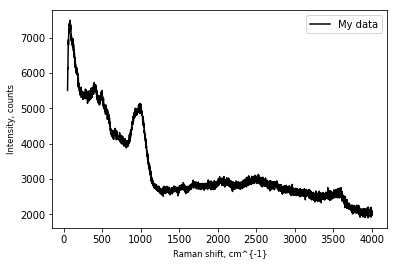

In [8]:
plt.plot(spectrum[:,0],spectrum[:,1],"k-",label="My data")
plt.xlabel(r"Raman shift, cm^{-1}")
plt.ylabel(r"Intensity, counts")
plt.legend()

## `pandas`, Excel and csv files

Now let's suppose that we have a list of spectra with other meta-information in a general excel spreadsheet. 

We could use numpy to try importing it, but this is a bad call since this mix numbers and letters (strings), which numpy can't deal with. Instead, we can use Pandas, which can cope with this, and also deals with missing values.

You can have different sheets and indicate which one you want to import by setting the sheet_name variable to the value you want.

If getting in trouble, look at the error message as sometimes some packages such as xlreader can be missing... If you see an error due to a missing package, just try installing the missing package and it should solve the problem.

## Excel interactions

In [9]:
db_pd = pd.read_excel("data/data_cll.xlsx", sheet_name="data_cll")
db_pd.head()

,Sample,Crystal,P,T,IR_E//A,IR_E//C,Raman,Redox,Mg#
0,1023,Fo,1.5,1200,IR_A_sp1,IR_B_sp1,Raman_sp1,0.1,0.80
1,1024,Fo,2.0,1300,IR_A_sp2,IR_B_sp2,Raman_sp2,0.2,0.85
2,1025,En,1.5,1400,IR_A_sp3,IR_B_sp3,Raman_sp3,0.3,0.90
3,1026,Fo,1.0,1500,IR_A_sp4,IR_B_sp4,Raman_sp4,0.2,0.95
4,1027,En,2.0,1200,IR_A_sp5,IR_B_sp5,Raman_sp5,0.1,0.80


## Another way would be to import a csv file

In [10]:
db_csv = pd.read_csv("data/data_cll.csv")
db_csv.head()

,Sample,Crystal,P,T,IR_E//A,IR_E//C,Raman,Redox,Mg#
0,1023,Fo,1.5,1200,IR_A_sp1,IR_B_sp1,Raman_sp1,0.1,0.80
1,1024,Fo,2.0,1300,IR_A_sp2,IR_B_sp2,Raman_sp2,0.2,0.85
2,1025,En,1.5,1400,IR_A_sp3,IR_B_sp3,Raman_sp3,0.3,0.90
3,1026,Fo,1.0,1500,IR_A_sp4,IR_B_sp4,Raman_sp4,0.2,0.95
4,1027,En,2.0,1200,IR_A_sp5,IR_B_sp5,Raman_sp5,0.1,0.80


#### Tip: pandas can read[ a lot of different formats](https://pandas.pydata.org/pandas-docs/stable/io.html).

### Pandas Indexing

Your data is a bit different from when it was in a numpy array now, because it has labels as well as numerical indices.

You can use numerical indices if you want, by using the `.iloc[row, column]` operator:

In [11]:
db_pd.iloc[:, 0].head()

0    1023
1    1024
2    1025
3    1026
4    1027
Name: Sample, dtype: int64

...but this doesn't make use of all the useful labels you've created. To use the named labels, you use the `.loc[row, column]` operator:

In [12]:
db_pd.loc[:, "T"]

0     1200
1     1300
2     1400
3     1500
4     1200
5     1300
6     1400
7     1500
8     1200
9     1300
10    1400
11    1500
12    1200
13    1300
14    1400
15    1500
16    1200
17    1300
18    1400
19    1500
20    1200
21    1300
22    1400
23    1500
24    1200
25    1300
26    1400
27    1500
28    1200
29    1300
30    1400
31    1500
32    1200
33    1300
34    1400
35    1500
36    1200
37    1300
38    1400
39    1500
40    1200
41    1300
42    1400
43    1500
44    1200
45    1300
46    1400
47    1500
48    1300
Name: T, dtype: int64

Note the use of the `:` here (like in numpy) to specify that you're selecting all the rows.

#### Logical Indexing

It's also possible to create 'logical indices' - i.e. select all rows that satisfy a certain set of conditions.

To do this, you need an array of `True` and `False` (`boolean`) values the same length as you DataFrame.

For example, to select all experiments done at 1200 °C:

In [27]:
db_pd.loc[:, 'T'] == 1200

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28     True
29    False
30    False
31    False
32     True
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40     True
41    False
42    False
43    False
44     True
45    False
46    False
47    False
48    False
Name: T, dtype: bool

You can now use this directly to select the rows where `T` is equal to `1200`:

In [28]:
db_pd.loc[db_pd.loc[:,"T"]==1200,:]

,Sample,Crystal,P,T,IR_E//A,IR_E//C,Raman,Redox,Mg#
0,1023,Fo,1.5,1200,IR_A_sp1,IR_B_sp1,Raman_sp1,0.1,0.8
4,1027,En,2.0,1200,IR_A_sp5,IR_B_sp5,Raman_sp5,0.1,0.8
8,1031,En,1.5,1200,IR_A_sp9,IR_B_sp9,Raman_sp9,0.7,0.8
12,1035,Fo,1.5,1200,IR_A_sp13,IR_B_sp13,Raman_sp13,0.5,0.8
16,1039,En,2.0,1200,IR_A_sp17,IR_B_sp17,Raman_sp17,0.6,0.8
20,1043,Fo,1.5,1200,IR_A_sp21,IR_B_sp21,Raman_sp21,1.0,0.8
24,1047,En,1.5,1200,IR_A_sp25,IR_B_sp25,Raman_sp25,0.3,0.8
28,1051,Fo,2.0,1200,IR_A_sp29,IR_B_sp29,Raman_sp29,0.5,0.8
32,1055,En,1.5,1200,IR_A_sp33,IR_B_sp33,Raman_sp33,0.0,0.8
36,1059,Fo,1.5,1200,IR_A_sp37,IR_B_sp37,Raman_sp37,0.2,0.8


These `boolean arrays` can be combined in various ways.

For example if I want all experiments done between 1.5 and 2.0 GPa:

In [29]:
db_pd.loc[(db_pd.loc[:,"P"] >= 1.5) & (db_pd.loc[:,"P"] <= 2),:]

,Sample,Crystal,P,T,IR_E//A,IR_E//C,Raman,Redox,Mg#
0,1023,Fo,1.5,1200,IR_A_sp1,IR_B_sp1,Raman_sp1,0.1,0.80
1,1024,Fo,2.0,1300,IR_A_sp2,IR_B_sp2,Raman_sp2,0.2,0.85
2,1025,En,1.5,1400,IR_A_sp3,IR_B_sp3,Raman_sp3,0.3,0.90
4,1027,En,2.0,1200,IR_A_sp5,IR_B_sp5,Raman_sp5,0.1,0.80
6,1029,Fo,1.5,1400,IR_A_sp7,IR_B_sp7,Raman_sp7,0.5,0.90
7,1030,Fo,2.0,1500,IR_A_sp8,IR_B_sp8,Raman_sp8,0.3,0.95
8,1031,En,1.5,1200,IR_A_sp9,IR_B_sp9,Raman_sp9,0.7,0.80
10,1033,En,2.0,1400,IR_A_sp11,IR_B_sp11,Raman_sp11,0.0,0.90
12,1035,Fo,1.5,1200,IR_A_sp13,IR_B_sp13,Raman_sp13,0.5,0.80
13,1036,Fo,2.0,1300,IR_A_sp14,IR_B_sp14,Raman_sp14,0.3,0.85


Of course, the result of those queries can be saved in new variables, which will be new Pandas Dataframes

In [30]:
db_subset = db_pd.loc[(db_pd.loc[:,"P"]>=1.5)&(db_pd.loc[:,"P"]<=2),:]
type(db_subset)

pandas.core.frame.DataFrame

In [31]:
db_subset

,Sample,Crystal,P,T,IR_E//A,IR_E//C,Raman,Redox,Mg#
0,1023,Fo,1.5,1200,IR_A_sp1,IR_B_sp1,Raman_sp1,0.1,0.80
1,1024,Fo,2.0,1300,IR_A_sp2,IR_B_sp2,Raman_sp2,0.2,0.85
2,1025,En,1.5,1400,IR_A_sp3,IR_B_sp3,Raman_sp3,0.3,0.90
4,1027,En,2.0,1200,IR_A_sp5,IR_B_sp5,Raman_sp5,0.1,0.80
6,1029,Fo,1.5,1400,IR_A_sp7,IR_B_sp7,Raman_sp7,0.5,0.90
7,1030,Fo,2.0,1500,IR_A_sp8,IR_B_sp8,Raman_sp8,0.3,0.95
8,1031,En,1.5,1200,IR_A_sp9,IR_B_sp9,Raman_sp9,0.7,0.80
10,1033,En,2.0,1400,IR_A_sp11,IR_B_sp11,Raman_sp11,0.0,0.90
12,1035,Fo,1.5,1200,IR_A_sp13,IR_B_sp13,Raman_sp13,0.5,0.80
13,1036,Fo,2.0,1300,IR_A_sp14,IR_B_sp14,Raman_sp14,0.3,0.85


## Split/Apply/Combine

In [32]:
groups = db_pd.groupby(['P', 'T'])  # group data by pressure and temperature

In [33]:
groups.aggregate([np.mean, np.std])  # calculate mean and standard deviation of groups

Sample              Redox             Mg#     
           mean        std    mean       std  mean  std
P   T                                                  
1.0 1300   1048  14.501231  0.5750  0.337004  0.85  0.0
    1500   1048  14.966630  0.4625  0.277424  0.95  0.0
1.5 1200   1045  14.966630  0.4750  0.391882  0.80  0.0
    1300   1071        NaN  0.7000       NaN  1.00  NaN
    1400   1045  14.501231  0.4625  0.297309  0.90  0.0
2.0 1200   1045  15.491933  0.3750  0.221736  0.80  0.0
    1300   1042  15.491933  0.2000  0.081650  0.85  0.0
    1400   1051  15.491933  0.4250  0.434933  0.90  0.0
    1500   1048  15.491933  0.5000  0.439697  0.95  0.0

In [34]:
# or use the groups in a loop:
for i, g in groups:
    # i is the 'row-index', g is the data subset
    print(i)
    print(g)
    print('')
    # you can put any function you like inside the loop,
    # making this a really powerful technique.

(1.0, 1300)
    Sample Crystal    P     T    IR_E//A    IR_E//C       Raman  Redox   Mg#
5     1028      En  1.0  1300   IR_A_sp6   IR_B_sp6   Raman_sp6    0.6  0.85
9     1032      Fo  1.0  1300  IR_A_sp10  IR_B_sp10  Raman_sp10    1.0  0.85
17    1040      En  1.0  1300  IR_A_sp18  IR_B_sp18  Raman_sp18    0.5  0.85
21    1044      En  1.0  1300  IR_A_sp22  IR_B_sp22  Raman_sp22    0.0  0.85
29    1052      En  1.0  1300  IR_A_sp30  IR_B_sp30  Raman_sp30    0.3  0.85
33    1056      Fo  1.0  1300  IR_A_sp34  IR_B_sp34  Raman_sp34    1.0  0.85
41    1064      Fo  1.0  1300  IR_A_sp42  IR_B_sp42  Raman_sp42    0.7  0.85
45    1068      En  1.0  1300  IR_A_sp46  IR_B_sp46  Raman_sp46    0.5  0.85

(1.0, 1500)
    Sample Crystal    P     T    IR_E//A    IR_E//C       Raman  Redox   Mg#
3     1026      Fo  1.0  1500   IR_A_sp4   IR_B_sp4   Raman_sp4    0.2  0.95
11    1034      En  1.0  1500  IR_A_sp12  IR_B_sp12  Raman_sp12    1.0  0.95
15    1038      Fo  1.0  1500  IR_A_sp16  IR_B_sp16

## Saving to excel

And I can save my new data subset in a new excel file!

In [35]:
db_subset.to_excel('data/data_subset.xlsx')

or even in the existing excel spreadsheet with a new sheet name. 

Let's do this last thing. 

First, let's come back to what does pd.read_excel that we saw previously.

The pd.read_excel command is an easy command, also called high-level command, to interact with excel files in one line.

It actually is the compilation of four steps, which are quite common when programming languages interacts with files on your system:

    1) the command first open a "channel" to your file;
    2) with this channel, which is actually a Python object, it reads things from the file.
    3) it saves reading results in a new Pandas DataFrame;
    4) it closes the "channel".

Those steps are very frequent when trying to read files from computers with any languages. For instance, np.genfromtxt() is also a high-level command that performs similar steps, but saving the results in a numpy array. If you want to understand this better, you can have a read of the Python help: https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files

Turning back to Pandas, for saving your DataFrame in Excel, there is no high-level interface and we need to do those four steps manually.

We first need to open an excel writer, indicate which DataFrame we want to add to this writer, save it, and close it:

### Saving to the existing file in a new sheet

We cannot apply the last method to save in a new sheet, because it overwrites the existing file. Instead, we can use the following method, found on [stackexchange](https://stackoverflow.com/questions/20219254/how-to-write-to-an-existing-excel-file-without-overwriting-data-using-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa):

In [36]:
from openpyxl import load_workbook

with pd.ExcelWriter('data/data_cll.xlsx', engine='openpyxl') as writer:
    writer.book = load_workbook('data/data_cll.xlsx')
    db_subset.to_excel(writer, "subset")

## Getting bored with spreadsheets? SQL!

.xlsx and .xls spreadsheets are very nice as long as your dataset is limited. Once you start to have more than 50-60 lines, files become hard to read and difficult to maintain. Furthermore, it is difficult to query only specific portions of your data with excel spreadsheets.

For large datasets, SQL databases can be a good way to go, particularly if you want to be able to ask for specific portions of your dataset easily. Another reason to consider the use of a SQL database is if you want to put your dataset on a server at RSES, and be able to access it anywhere in the word with a different computer by running queries from your Python/Matlab/R scripts.


## Importing our data saved as an SQLite database.

Several SQL database formats exist, each one being specialised in some use. For the general user, two formats stand out: SQLite, as an easy and powerful local one, and MySQL for online databases.

In this example, I will use SQLite with the `sqlite3` python library (`sqlalchemy` seems also needed). A good tool to manipulate easily the SQL table is to use the DB Browser for SQLite software, for instance.

REading and writing things in SQL database is done with queries. Please consult documentation at this link:

http://www.sqlitetutorial.net/

for further information. 

As for writing data in spreadsheet, we need to connect to the database betfore anything. Let's open a connector:

In [37]:
import sqlite3

In [40]:
conn= sqlite3.connect('data/data.db')
conn

The connection is open. Now we actually need to run queries to get our data from this database. To facilitate this task, let's use the Pandas tool to save results from SQL queries in Pandas dataframe.

One thing we could do, is to read the entire SQL table we want, which is data_cll:

In [41]:
db_sql_1 = pd.read_sql_query("SELECT * FROM data_cll",conn)
db_sql_1.head()

,Sample,Crystal,P,T,IR_E//A,IR_E//C,Raman,Redox,Mg#
0,1023,Fo,1.5,1200,IR_A_sp1,IR_B_sp1,Raman_sp1,0.1,0.8
1,1024,Fo,2,1300,IR_A_sp2,IR_B_sp2,Raman_sp2,0.2,0.85
2,1025,En,1.5,1400,IR_A_sp3,IR_B_sp3,Raman_sp3,0.3,0.9
3,1026,Fo,1,1500,IR_A_sp4,IR_B_sp4,Raman_sp4,0.2,0.95
4,1027,En,2,1200,IR_A_sp5,IR_B_sp5,Raman_sp5,0.1,0.8


Interesting thing: we can run queries while importing data, which avoids any further processing in Python. For instance, to grab all experiments performed at 1.0 GPa:

In [42]:
db_sql_1GPa = pd.read_sql_query("SELECT * FROM data_cll WHERE P == '1'",conn) # we use '1' here as the column P contains text and not numbers... this is my bad, as idealy the columns with numbers should be set as number in the SQLite database...
db_sql_1GPa.head()

,Sample,Crystal,P,T,IR_E//A,IR_E//C,Raman,Redox,Mg#
0,1026,Fo,1,1500,IR_A_sp4,IR_B_sp4,Raman_sp4,0.2,0.95
1,1028,En,1,1300,IR_A_sp6,IR_B_sp6,Raman_sp6,0.6,0.85
2,1032,Fo,1,1300,IR_A_sp10,IR_B_sp10,Raman_sp10,1,0.85
3,1034,En,1,1500,IR_A_sp12,IR_B_sp12,Raman_sp12,1,0.95
4,1038,Fo,1,1500,IR_A_sp16,IR_B_sp16,Raman_sp16,0.1,0.95


The interesting thing is that we can run very complex queries in a quite easy way:

In [43]:
db_sql_2GPa_1200deg_Fo = pd.read_sql_query("SELECT * FROM data_cll WHERE P == '2' AND T == '1200'AND Crystal == 'En'",conn) # we use '1' here as the column P contains text and not numbers... this is my bad, as idealy the columns with numbers should be set as number in the SQLite database...
db_sql_2GPa_1200deg_Fo

,Sample,Crystal,P,T,IR_E//A,IR_E//C,Raman,Redox,Mg#
0,1027,En,2,1200,IR_A_sp5,IR_B_sp5,Raman_sp5,0.1,0.8
1,1039,En,2,1200,IR_A_sp17,IR_B_sp17,Raman_sp17,0.6,0.8


### IMPORTANT: Once finish, ALWAYS close the connector.

In [44]:
conn.close()

## There are other formats out there...

- HDF5
- NETCDF 
- pickle
- json